In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc siz

In [2]:
iris_data = pd.read_csv("iris.data.txt",sep=",",header=None)
iris_data.columns = ["sepal_length_cm","sepal_width_cm","petal_length_cm","petal_width_cm","class"]

In [3]:
iris_data = pd.read_csv("iris_data01.csv",na_values=['NA'])

In [4]:
iris_data.drop(columns='Unnamed: 0',inplace=True)

In [5]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


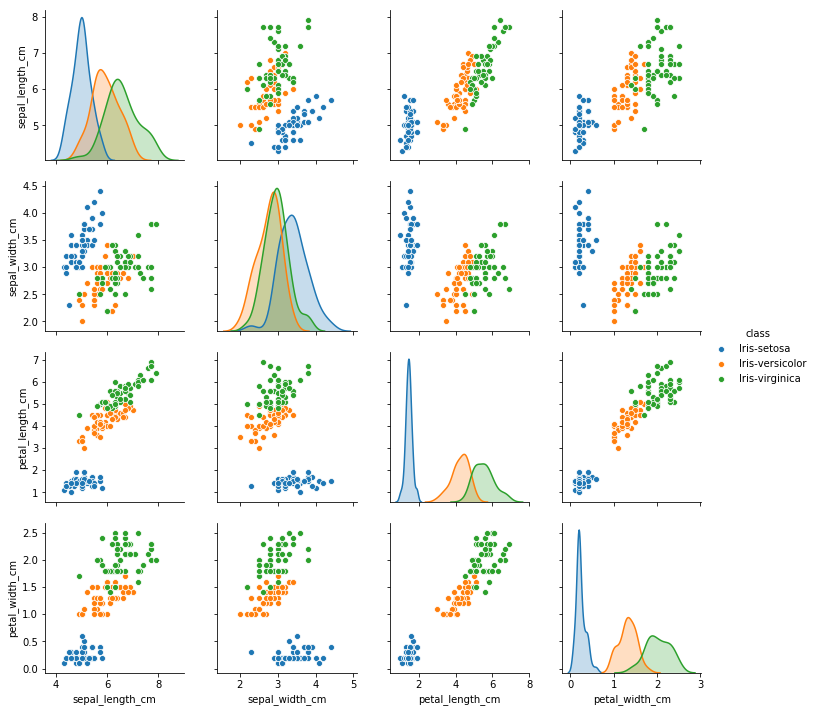

In [6]:
sns.pairplot(iris_data.dropna(),hue='class')

In [7]:
iris_data['class'].replace(['versicolor'], 'Iris-versicolor')

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [8]:
iris_data['class'].replace(['Iris-setossa'], 'Iris-setosa')

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [9]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

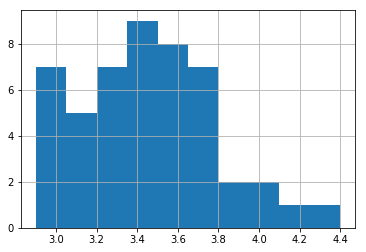

In [10]:
iris_data = iris_data.loc[(iris_data['class']!= 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class']== 'Iris-setosa', 'sepal_width_cm'].hist()

In [11]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


''

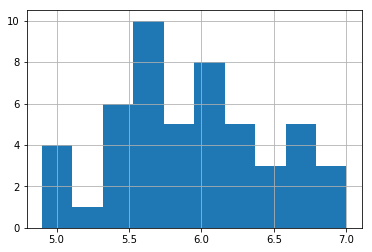

In [12]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
;

In [13]:
iris_data[(iris_data['sepal_length_cm'].isnull()) |
         (iris_data['sepal_width_cm'].isnull())   |
          (iris_data['petal_length_cm'].isnull()) |
          (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [14]:
iris_data.to_csv('iris_clean_data.csv',index=False)
iris_data_clean = pd.read_csv('iris_clean_data.csv')
iris_data_clean.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


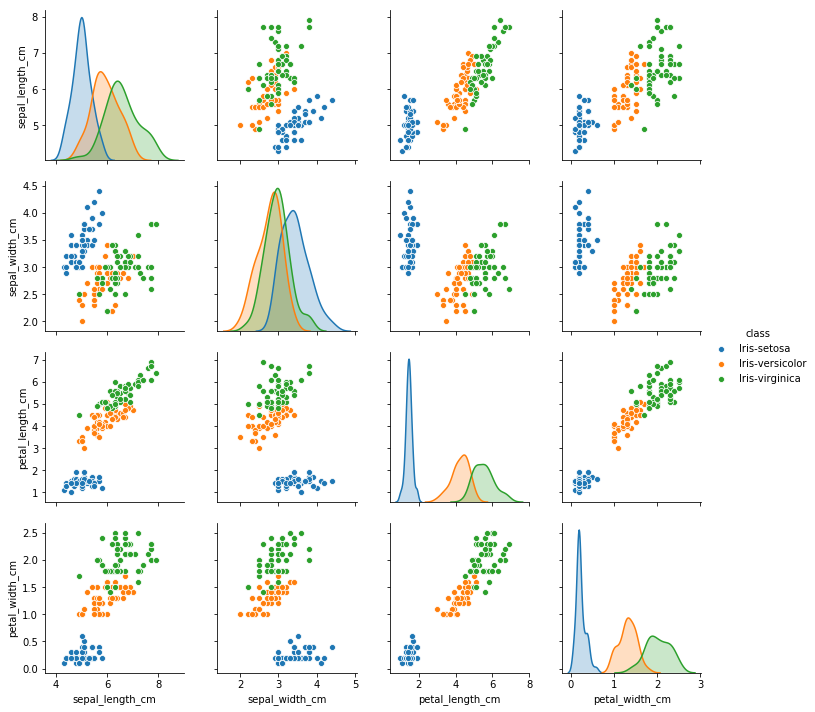

In [15]:
sns.pairplot(iris_data_clean,hue='class')

## Testing data

In [16]:
assert len(iris_data['class'].unique()) == 3

In [17]:
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor','sepal_length_cm'].min() >=2.5

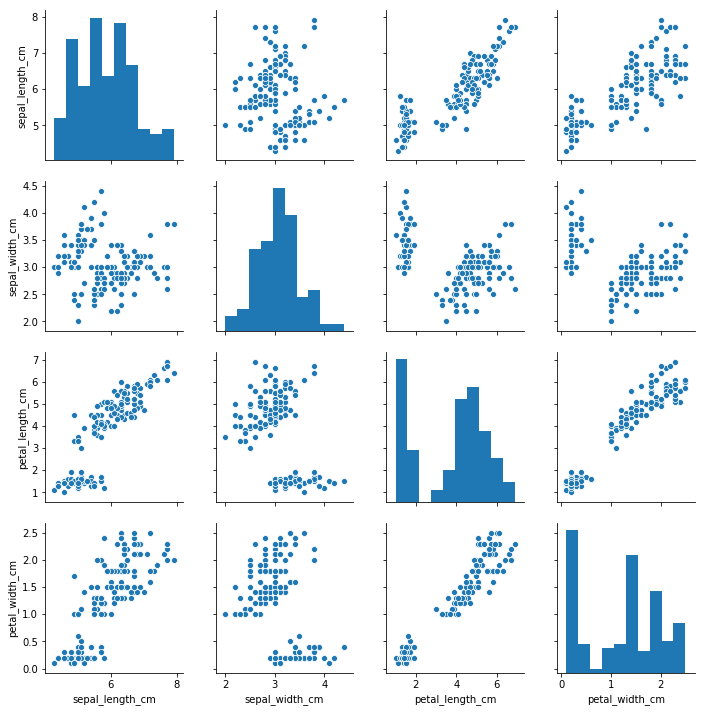

In [18]:
sns.pairplot(iris_data_clean)

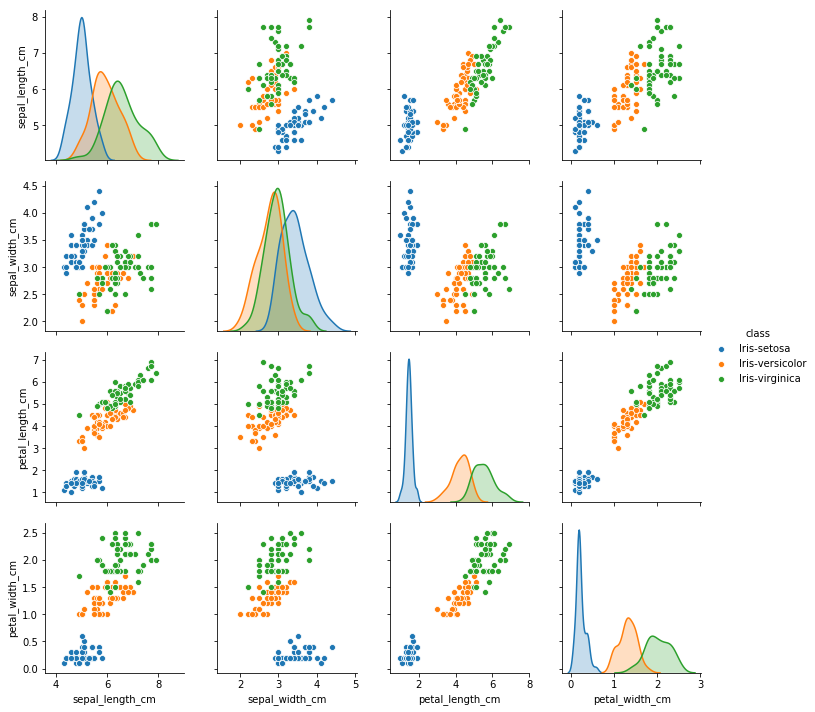

In [19]:
sns.pairplot(iris_data_clean,hue='class')

In [20]:
iris_data_clean = pd.read_csv('iris_clean_data.csv')
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values
labels = iris_data_clean['class'].values
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [21]:
(training_inputs,testing_inputs,training_classes,testing_classes) =train_test_split(all_inputs,labels,test_size=0.25,random_state=1)

In [22]:
decision_tree_classifier = DecisionTreeClassifier()

In [23]:
decision_tree_classifier.fit(training_inputs,training_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
decision_tree_classifier.score(testing_inputs,testing_classes)

0.9736842105263158

(array([  1.,   2.,  11.,  34.,   0.,  87., 201., 344., 243.,  77.]),
 array([0.78947368, 0.81052632, 0.83157895, 0.85263158, 0.87368421,
        0.89473684, 0.91578947, 0.93684211, 0.95789474, 0.97894737,
        1.        ]),
 <a list of 10 Patch objects>)

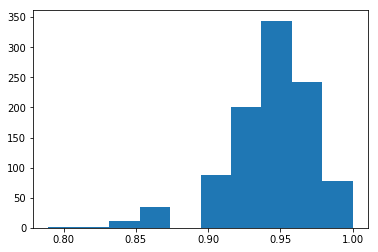

In [27]:
model_accuracies = []
for repetition in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs,labels,test_size=0.25)
    
    decision_tree_classifier= DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs,training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs,testing_classes)
    model_accuracies.append(classifier_accuracy)
plt.hist(model_accuracies)